In [1]:
from Swimmer import *
import numpy as np
plt.rc('text', usetex=True)
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

## Initialization

In [2]:
T=1
R=1
a = 10*R
epsilons = np.linspace(0.1,5,50)*R

steps = 1000
nsteps = 1000
dt = T/steps

r0 = np.array([[0, 0, 0],
[0, 0, a],
[a*np.sqrt(8)/3, 0 , -a/3],
[-a*np.sqrt(8)/6, a*np.sqrt(24)/6 , -a/3],
[-a*np.sqrt(8)/6, -a*np.sqrt(24)/6, -a/3]])

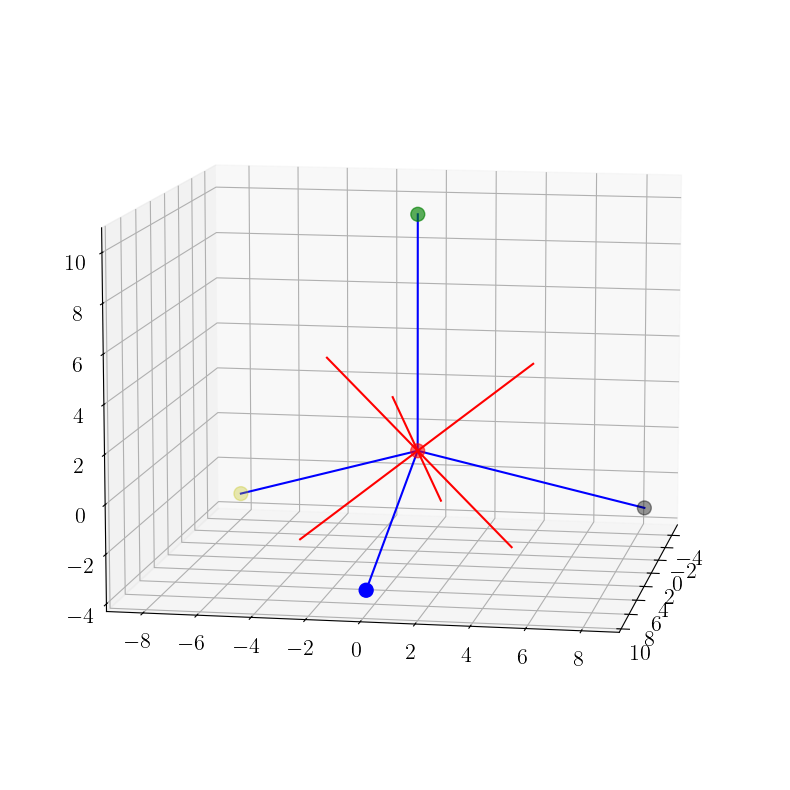

In [3]:


r  =r0
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
# plt.title("The bisectors of the joints")
colors = ('r', 'g', 'b', 'k','y')
ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")


ax.plot(xs = [(r[1,0] + r[2,0])/2 , r[0,0]] , ys = [(r[1,1] + r[2,1])/2  , r[0,1]] , zs = [(r[1,2] + r[2,2])/2  , r[0,2]],c="r")

ax.plot(xs = [(r[1,0] + r[3,0])/2 , r[0,0]] , ys = [(r[1,1] + r[3,1])/2  , r[0,1]] , zs = [(r[1,2] + r[3,2])/2  , r[0,2]],c="r")

ax.plot(xs = [(r[1,0] + r[4,0])/2 , r[0,0]] , ys = [(r[1,1] + r[4,1])/2  , r[0,1]] , zs = [(r[1,2] + r[4,2])/2  , r[0,2]],c="r")

ax.plot(xs = [(r[3,0] + r[2,0])/2 , r[0,0]] , ys = [(r[3,1] + r[2,1])/2  , r[0,1]] , zs = [(r[3,2] + r[2,2])/2  , r[0,2]],c="r")

ax.plot(xs = [(r[4,0] + r[2,0])/2 , r[0,0]] , ys = [(r[4,1] + r[2,1])/2  , r[0,1]] , zs = [(r[4,2] + r[2,2])/2  , r[0,2]],c="r")

ax.plot(xs = [(r[3,0] + r[4,0])/2 , r[0,0]] , ys = [(r[3,1] + r[4,1])/2  , r[0,1]] , zs = [(r[3,2] + r[4,2])/2  , r[0,2]],c="r")




ax.view_init(10,10)

# ax.set_zticks([])
# ax.set_xticks([])
# ax.set_yticks([])

plt.savefig("3_1.png")


In [4]:

for j in range(1,5):
    print(r[j]-r[0])

print(np.array([(r[1,0] + r[2,0])/2 , (r[1,1] + r[2,1])/2  , (r[1,2] + r[2,2])/2 ]))
print(np.array([(r[1,0] + r[3,0])/2 , (r[1,1] + r[3,1])/2  , (r[1,2] + r[3,2])/2 ]))
print(np.array([(r[1,0] + r[4,0])/2 , (r[1,1] + r[4,1])/2  , (r[1,2] + r[4,2])/2 ]))
print(np.array([(r[3,0] + r[2,0])/2 , (r[3,1] + r[2,1])/2  , (r[3,2] + r[2,2])/2 ]))
print(np.array([(r[4,0] + r[2,0])/2 , (r[4,1] + r[2,1])/2  , (r[4,2] + r[2,2])/2 ]))
print(np.array([(r[3,0] + r[4,0])/2 , (r[3,1] + r[4,1])/2  , (r[3,2] + r[4,2])/2 ]))

[ 0.  0. 10.]
[ 9.42809042  0.         -3.33333333]
[-4.71404521  8.16496581 -3.33333333]
[-4.71404521 -8.16496581 -3.33333333]
[4.71404521 0.         3.33333333]
[-2.3570226   4.0824829   3.33333333]
[-2.3570226  -4.0824829   3.33333333]
[ 2.3570226   4.0824829  -3.33333333]
[ 2.3570226  -4.0824829  -3.33333333]
[-4.71404521  0.         -3.33333333]


### What identifies springs direction?

In [6]:
sequences = getSequences()

In [7]:
sequences = np.zeros((24,4),dtype=np.int64)

perm = list(permutations([1,2,3,4]))

for i in range(24):
    sequences[i] = list(perm[i])

sequences

array([[1, 2, 3, 4],
       [1, 2, 4, 3],
       [1, 3, 2, 4],
       [1, 3, 4, 2],
       [1, 4, 2, 3],
       [1, 4, 3, 2],
       [2, 1, 3, 4],
       [2, 1, 4, 3],
       [2, 3, 1, 4],
       [2, 3, 4, 1],
       [2, 4, 1, 3],
       [2, 4, 3, 1],
       [3, 1, 2, 4],
       [3, 1, 4, 2],
       [3, 2, 1, 4],
       [3, 2, 4, 1],
       [3, 4, 1, 2],
       [3, 4, 2, 1],
       [4, 1, 2, 3],
       [4, 1, 3, 2],
       [4, 2, 1, 3],
       [4, 2, 3, 1],
       [4, 3, 1, 2],
       [4, 3, 2, 1]])

In [17]:
a1,a2,a3,a4 = r0[1:]
def getMirror(a1,a2):
    n = np.cross(a1,a2)/np.linalg.norm(np.cross(a1,a2))
    M = np.eye(3) - 2*np.outer(n , n.T)
    return M 

def getRotation(a1 , theta):
    theta = np.pi/2
    u = a1/np.linalg.norm(a1)
    u_cross = np.array([[0, -u[2], u[1]],[u[2], 0, -u[0]],[-u[1], u[0], 0]])
    u_cross_u = np.outer(u,u.T)
    R = np.cos(theta)*np.eye(3) + np.sin(theta)*u_cross + (1-np.cos(theta))*u_cross_u 
    return R
    
M12 = getMirror(a1,a2)
M13 = getMirror(a1,a3)
M14 = getMirror(a1,a4)
M23 = getMirror(a2,a3)
M24 = getMirror(a2,a4)
M34 = getMirror(a3,a4)
Rot1 = getRotation(a1,2*np.pi/3)
Rot2 = getRotation(a1,2*np.pi/3)
Rot3 = getRotation(a1,2*np.pi/3)
Rot4 = getRotation(a1,2*np.pi/3)


T1234 = np.eye(3)
T1243 = M34 
T1324 = M24 @ Rot1 
T1342 = Rot1 
T1423 = Rot1 @ Rot1  
T1432 = M24 

T2134 = M12
T2143 = M12 @ M34
T2314 = Rot4 
T2341 = M14 @ Rot4
T2413 = M13 @ M14 @M12 
T2431 = M14 @ M12

T3124 = M13 @ M23
T3142 = M24 @ M13 @ M23
T3214 = M13 
T3241 = Rot2 
T3412 = M13 @ M24
T3421 = M12 @ M13 @ M24

T4123 = M23 @ Rot3 @ Rot3
T4132 = Rot3 @ Rot3
T4213 = M14 @ M34
T4231 = M14 
T4312 = M12 @ M14 @ M23 
T4321 = M14 @ M23 





Ts = np.array([T1234,
T1243,
T1324,
T1342, 
T1423, 
T1432, 

T2134,
T2143, 
T2314, 
T2341, 
T2413, 
T2431, 

T3124, 
T3142, 
T3214, 
T3241, 
T3412, 
T3421, 

T4123,
T4132, 
T4213, 
T4231, 
T4312, 
T4321 


])

delta = deltaData[0]
rotation = rotationData[0]


Ts.shape
Trans = Ts[4]
eigvals , eigvec = np.linalg.eig(Trans)
print(eigvals[2] , eigvec[2])
eigvals , eigvec = np.linalg.eig(rotation)
print(eigvals , eigvec)
print(eigvec[:,2])

print("cross: ",np.cross(delta ,eigvec[:,2] ))

print("cross: ",np.cross(Trans @ delta ,Trans @ eigvec[:,2] ))
# for i in range(24):

#     Transform = Ts[i]
#     print(np.linalg.det(Transform))
#     np.linalg

# np.linalg.inv(Trans) - Trans.T

(1+0j) [0.-0.j 0.+0.j 1.+0.j]
[0.99974255+0.02269053j 0.99974255-0.02269053j 1.00000006+0.j        ] [[ 0.64470516+0.j          0.64470516-0.j         -0.4107398 +0.j        ]
 [ 0.22524312-0.44640006j  0.22524312+0.44640006j  0.70709999+0.j        ]
 [ 0.18335487+0.54838743j  0.18335487-0.54838743j  0.57558876+0.j        ]]
[-0.4107398 +0.j  0.70709999+0.j  0.57558876+0.j]
cross:  [ 0.01142197+0.j  0.02021194-0.j -0.01667928+0.j]
cross:  [-0.01142197+0.j -0.02021194+0.j -0.01667928+0.j]


In [ ]:
# (Transform @ poses.T).T

array([[-1.75893795e-02, -1.03272952e-02, -2.45598178e-02],
       [-3.54318944e-02, -2.11131422e-02, -4.87369578e-02],
       [-5.35153509e-02, -3.23571625e-02, -7.25231835e-02],
       ...,
       [ 5.52981899e+00, -1.16265028e+01, -6.41736287e+00],
       [ 5.56118999e+00, -1.16240075e+01, -6.42273830e+00],
       [ 5.59243558e+00, -1.16211559e+01, -6.42864104e+00]])

In [135]:
poses.shape

(1000, 3)

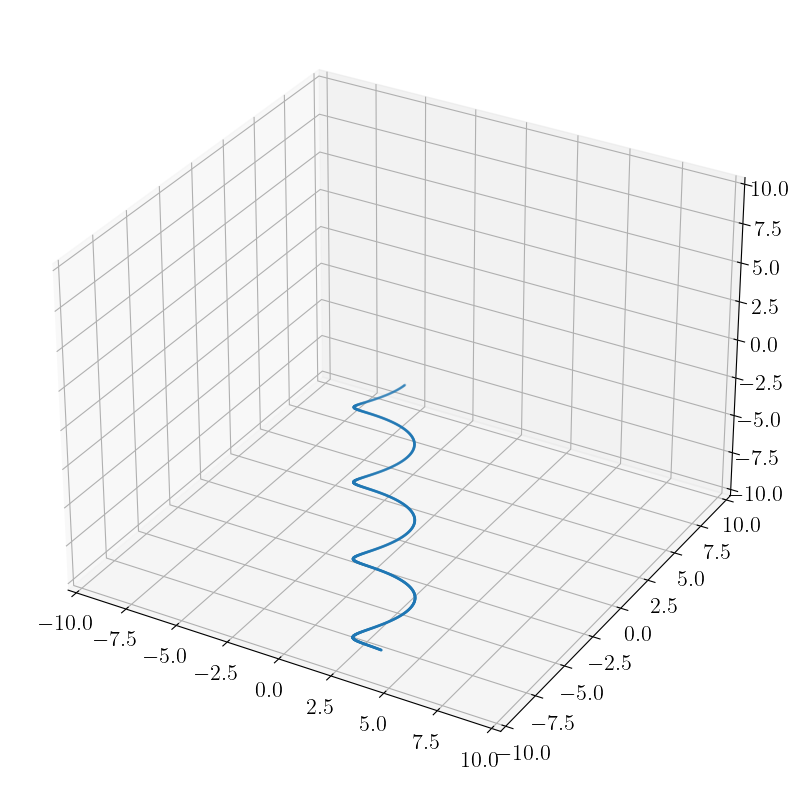

14.410205599353588


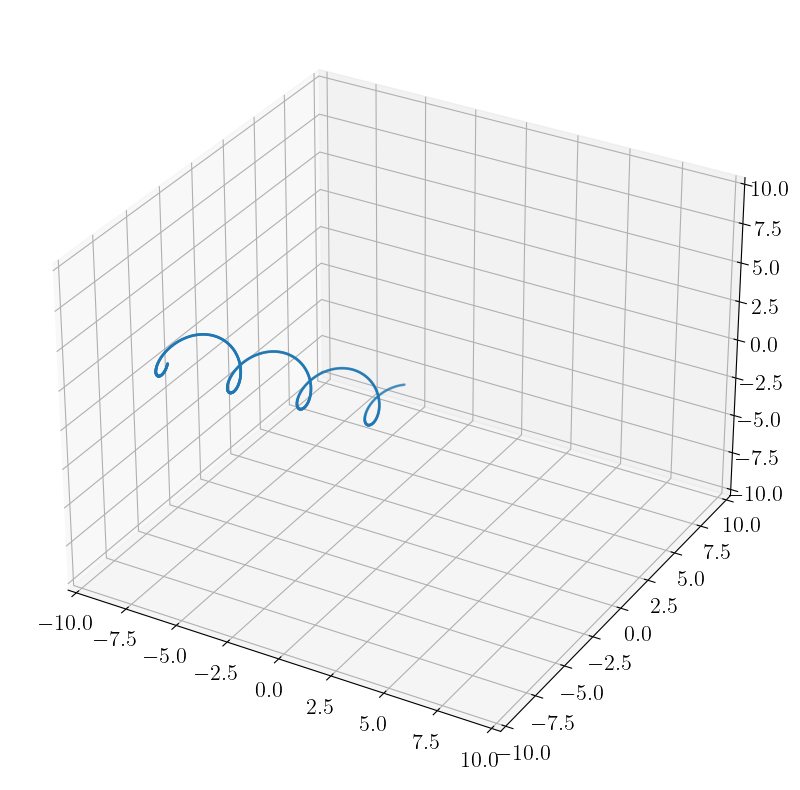

14.410205599353588


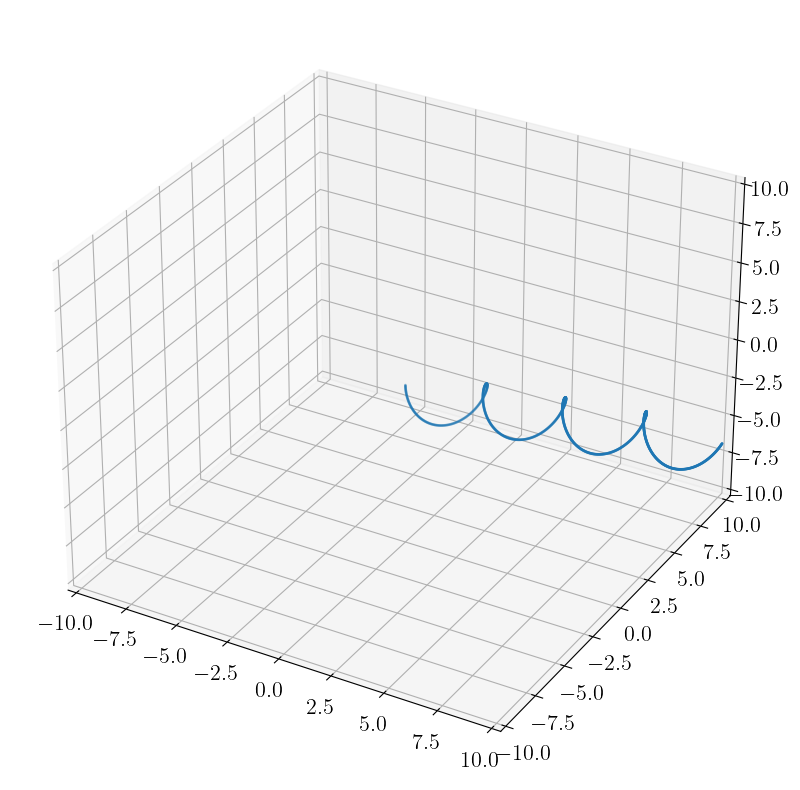

14.410205599353588


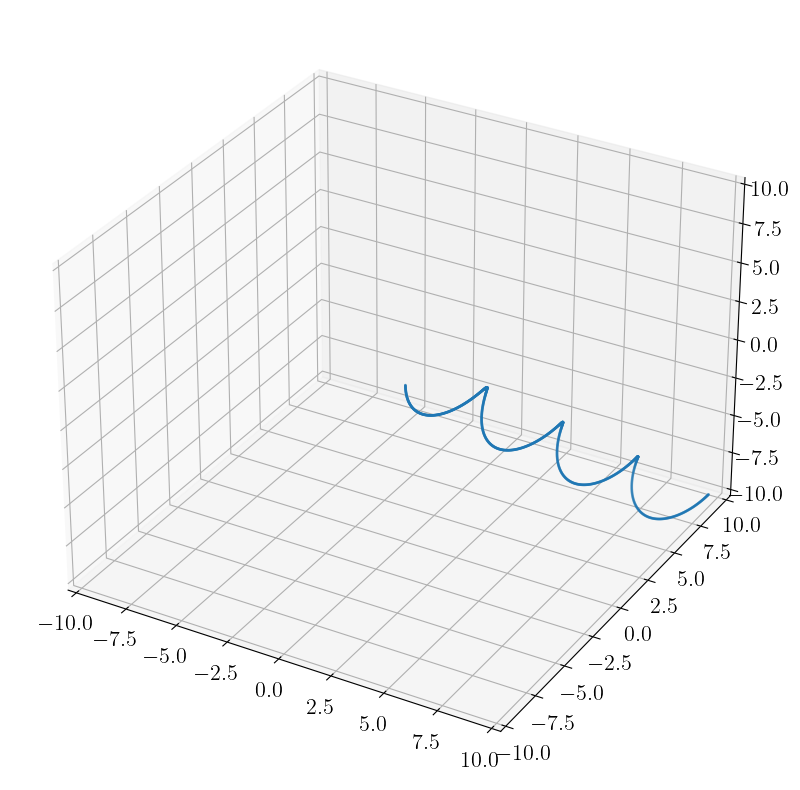

14.410205599353588


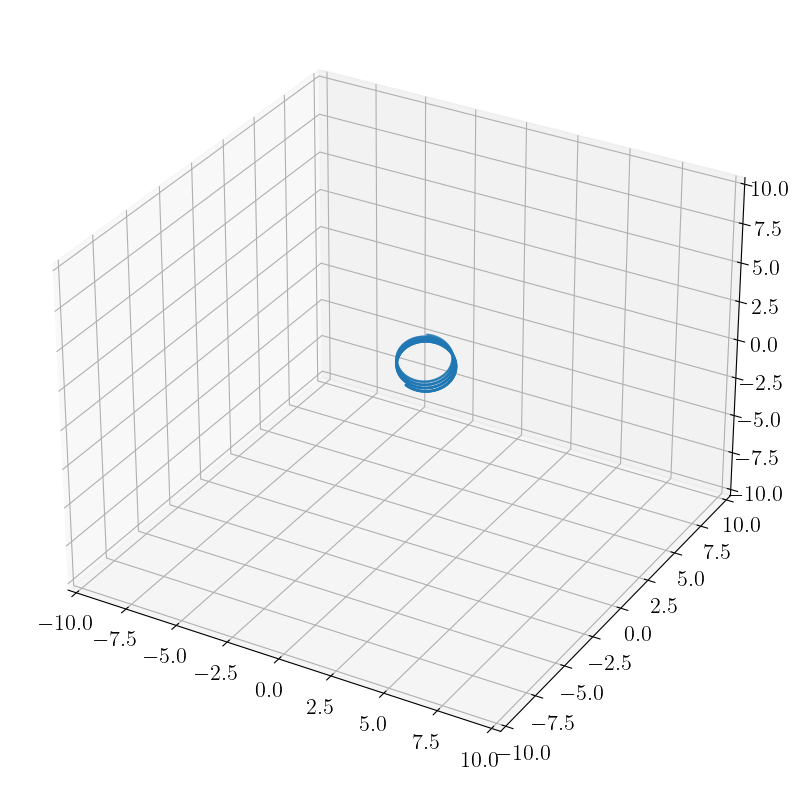

14.410205599353588


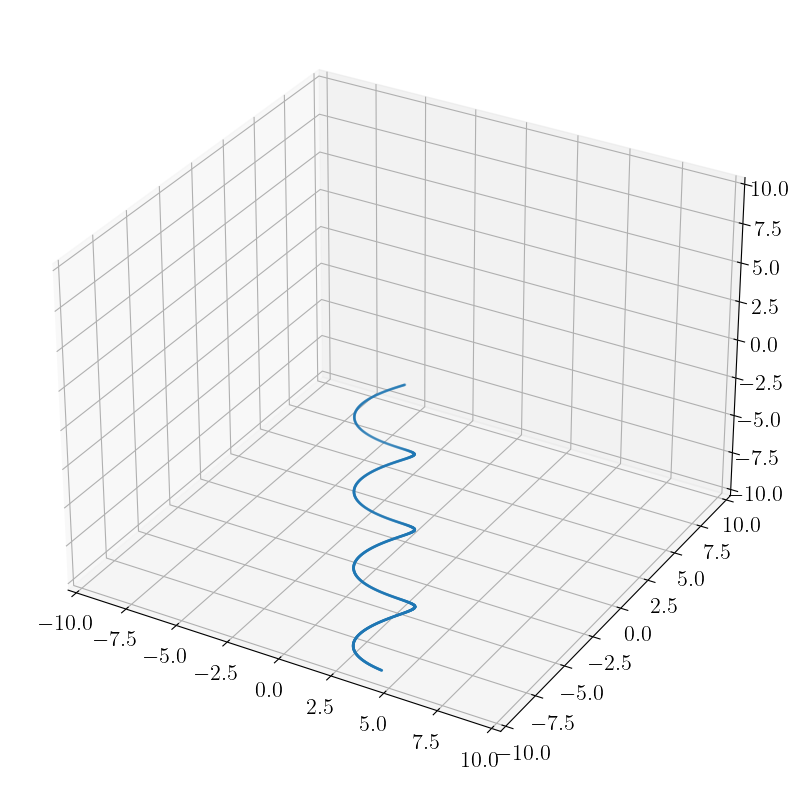

14.410205599353588


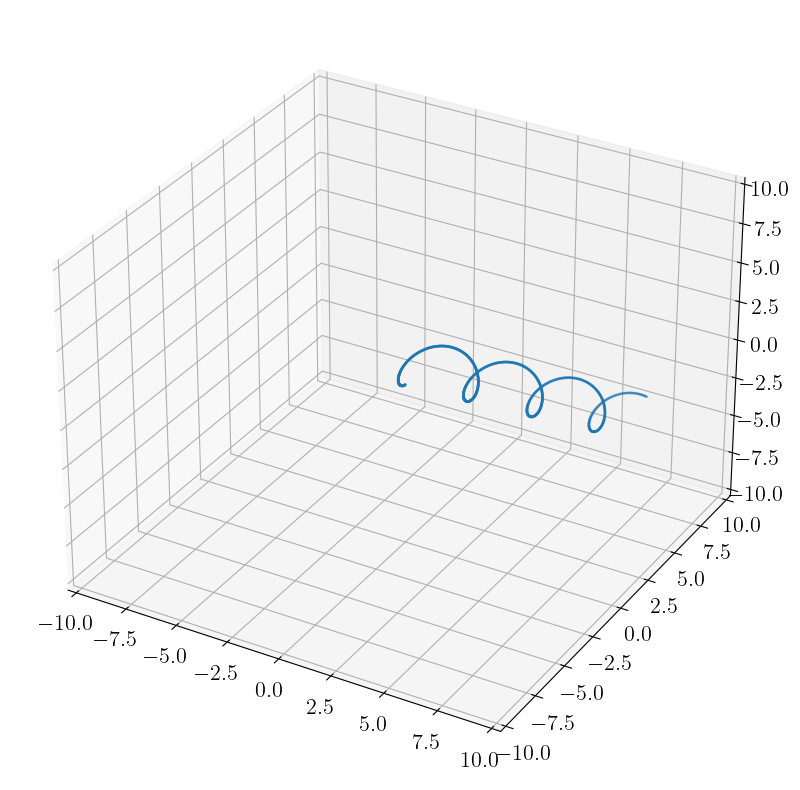

14.410205599353588


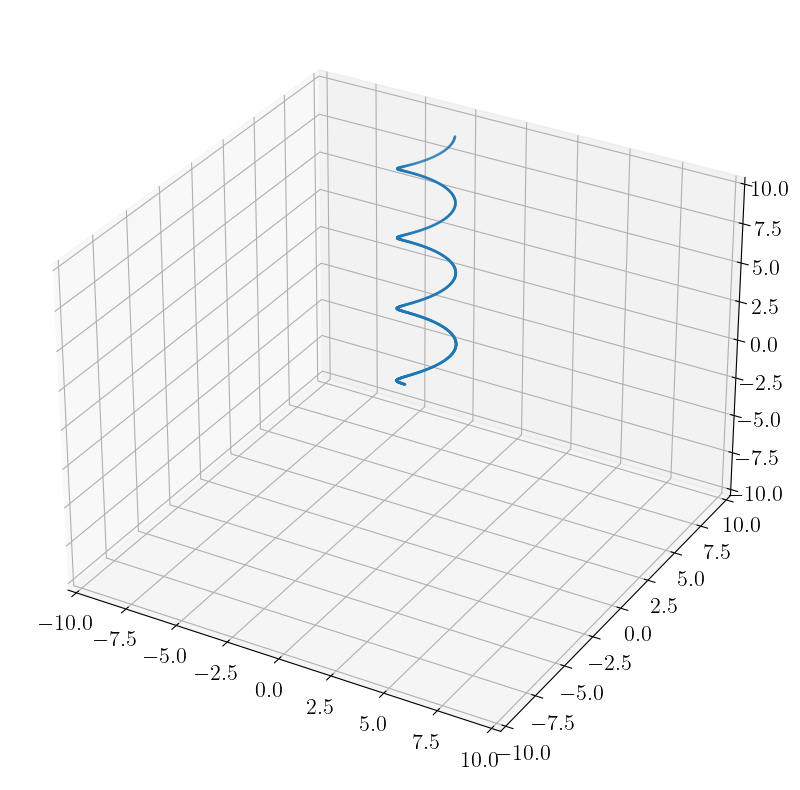

14.410205599353588


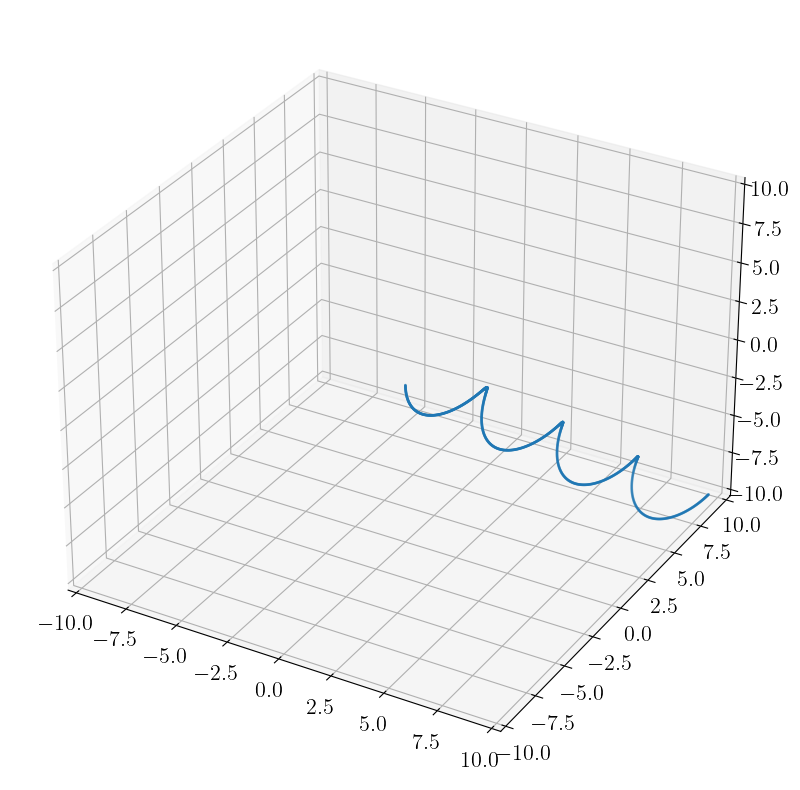

14.410205599353588


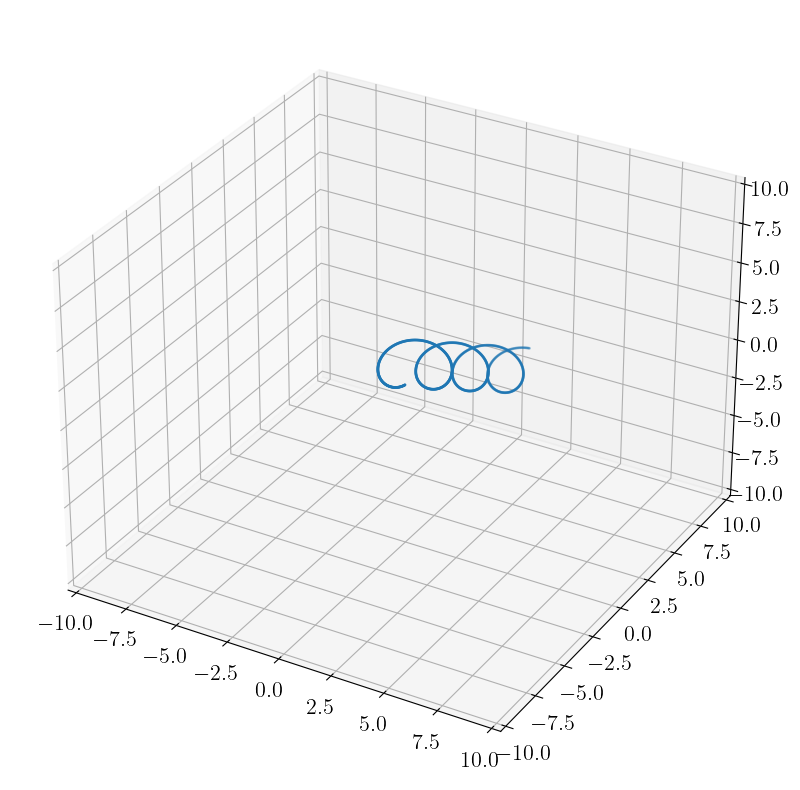

14.410205599353588


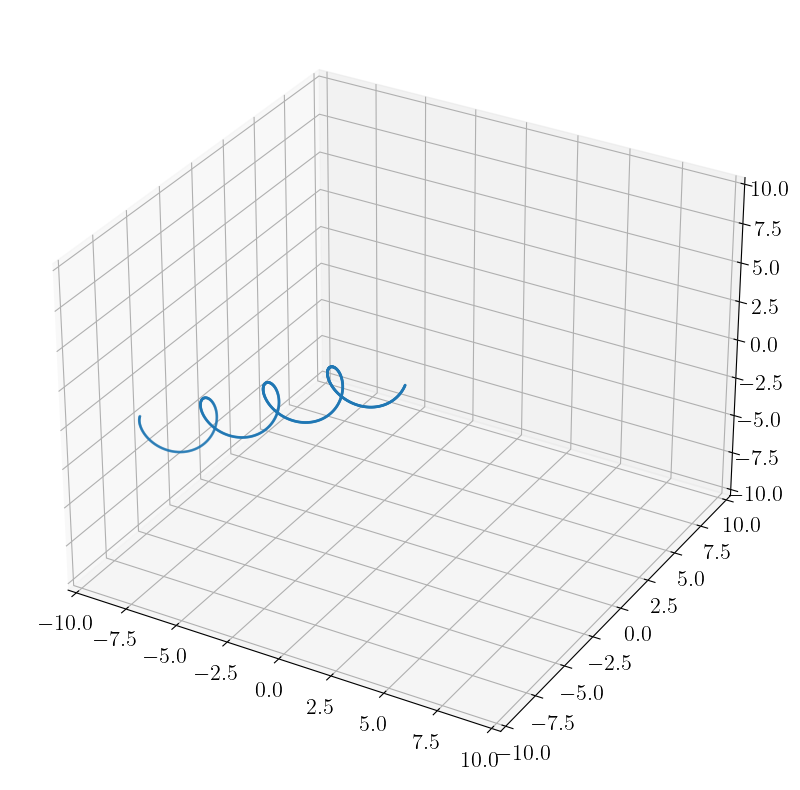

14.410205599353588


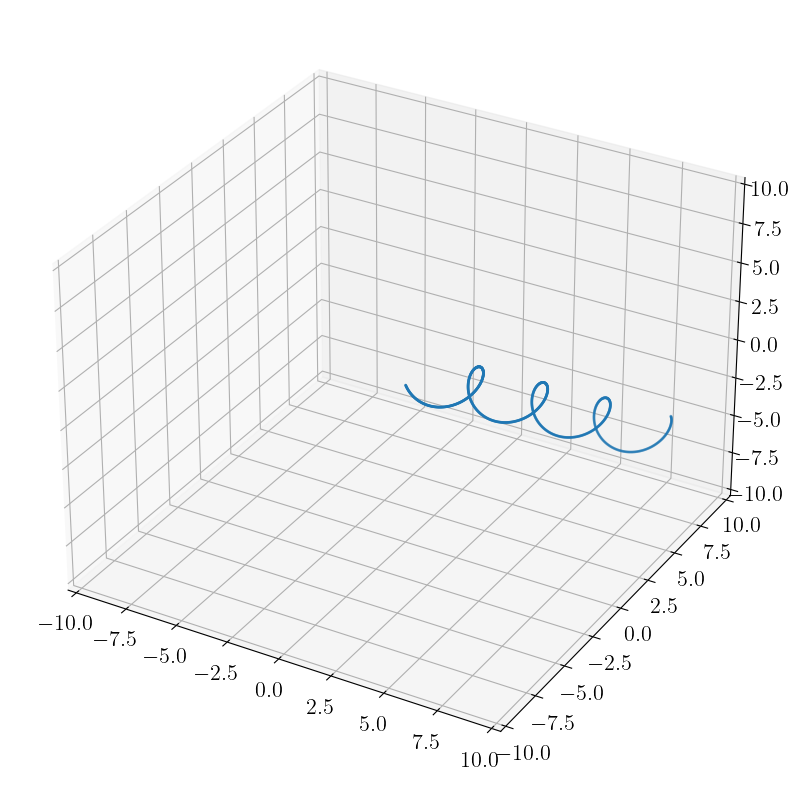

14.410205599353588


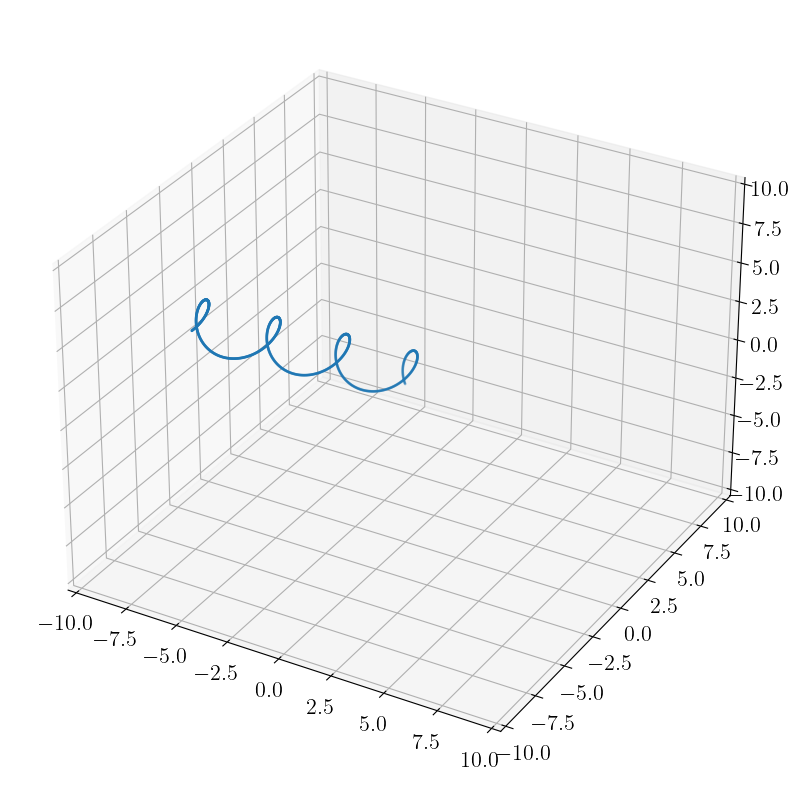

14.410205599353588


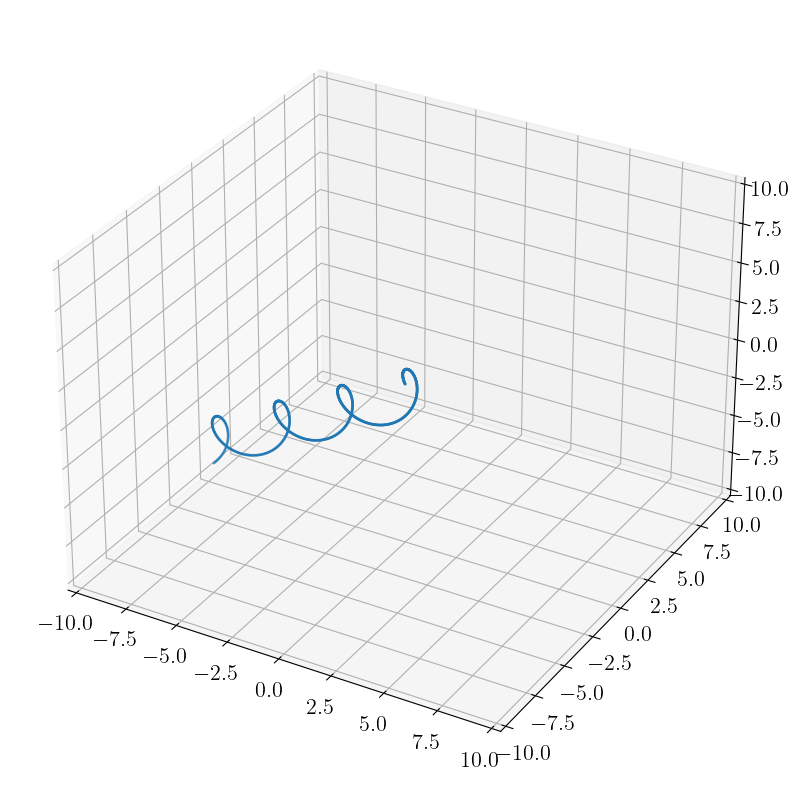

14.410205599353588


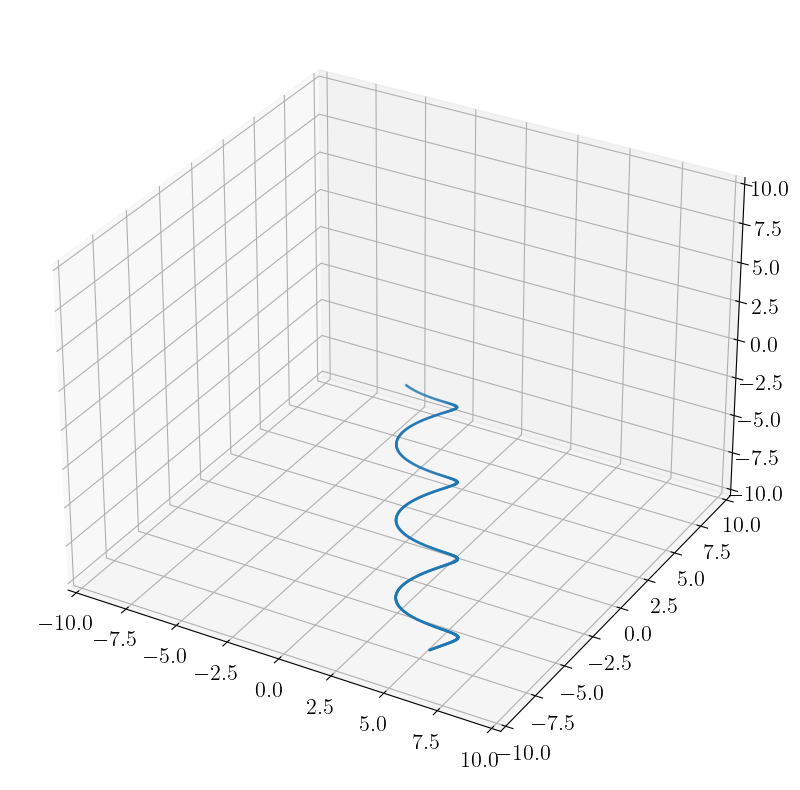

14.410205599353588


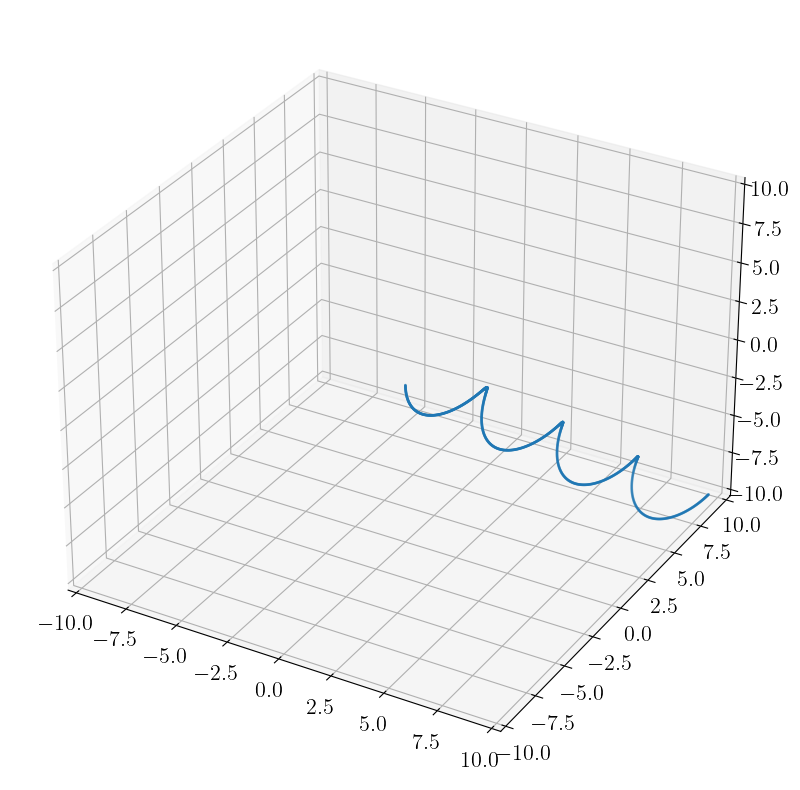

14.410205599353588


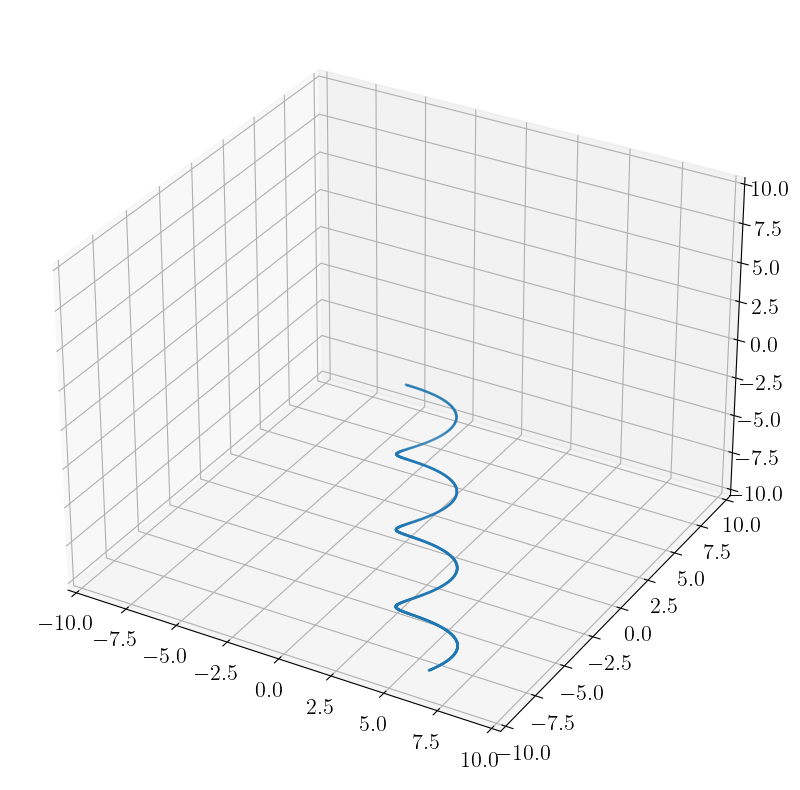

14.410205599353588


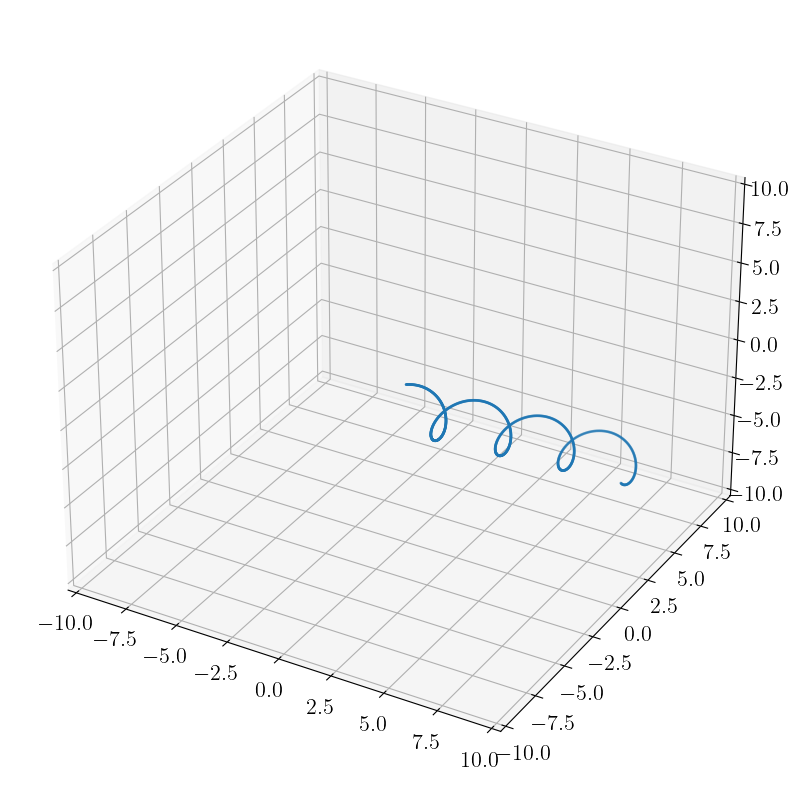

14.410205599353588


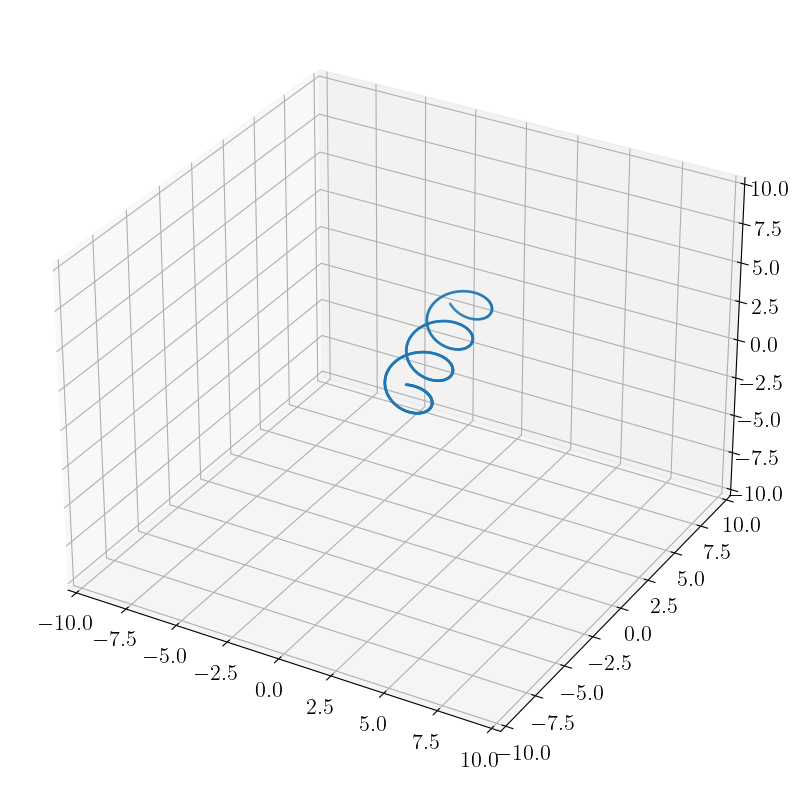

14.410205599353588


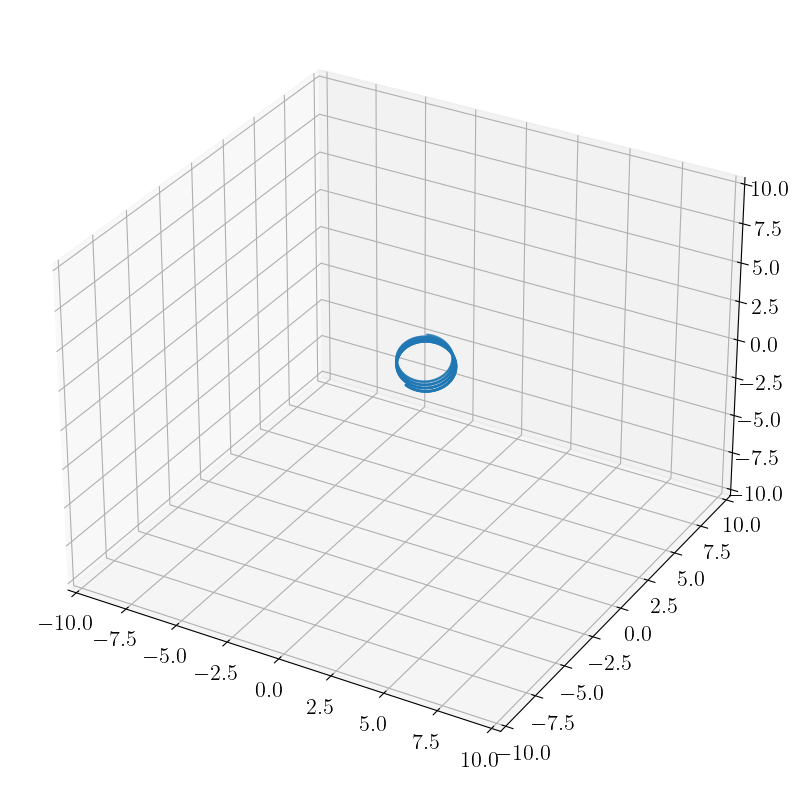

14.410205599353588


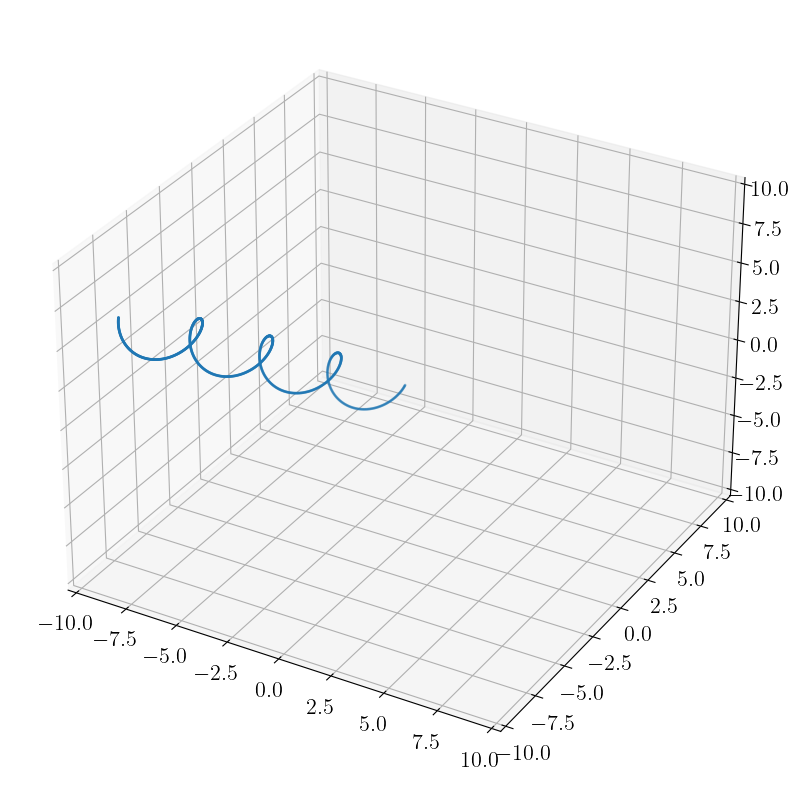

14.410205599353588


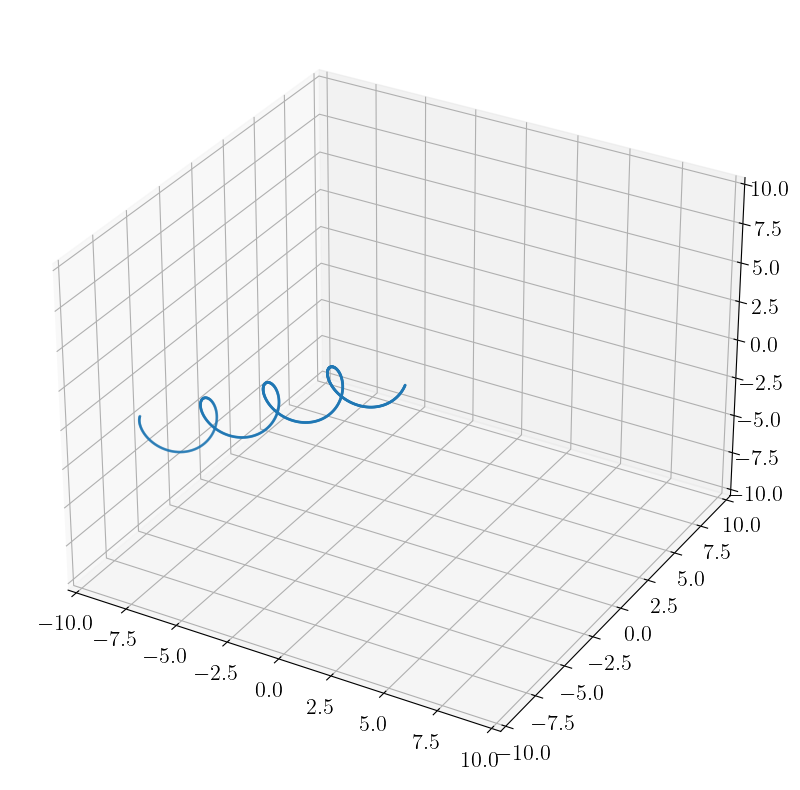

14.410205599353588


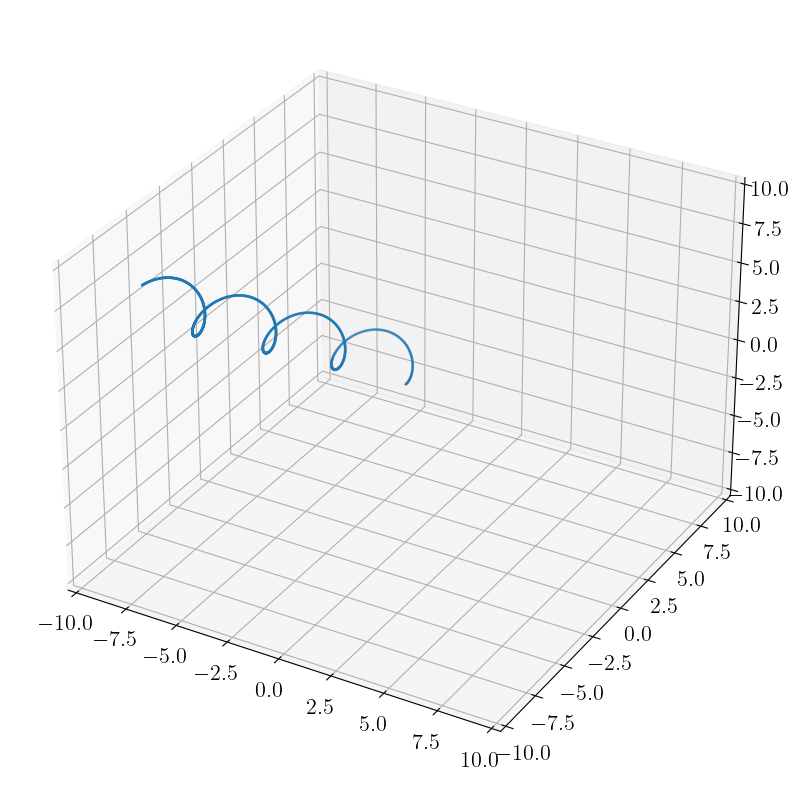

14.410205599353588


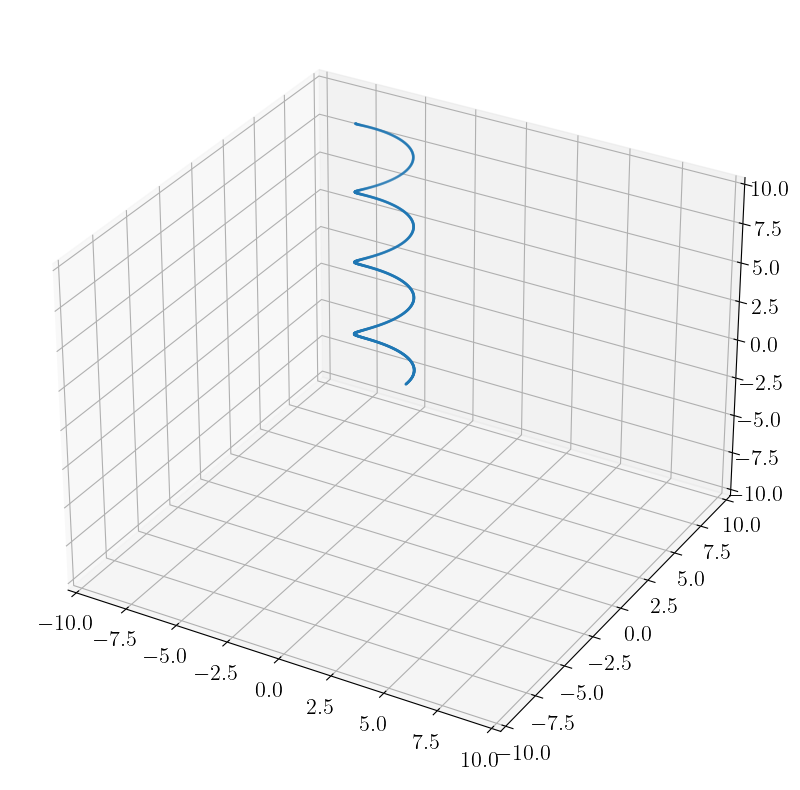

14.410205599353588


In [21]:

rotorStep = 1_000

rotorR = np.array([0.,0.,0.])
rotorRotation = np.eye(3)
poses = np.zeros((rotorStep,3))


for j in range(rotorStep):
    rotorR += np.matmul(rotorRotation,delta)
    rotorRotation = np.matmul( rotation ,rotorRotation)
    poses[j,:] = rotorR

for i in range(24):
    Transform = Ts[i]




    newP = (Transform @ poses.T).T


    
    ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
    ax.scatter(xs = newP[:,0],ys = newP[:,1], zs=newP[:,2],s=1)
    ax.set_xlim((-10,10))
    ax.set_ylim((-10,10))
    ax.set_zlim((-10,10))

    plt.show()

    print(np.linalg.norm(rotorR))





In [9]:

rotorStep = 1_000


for i in range(24):
    Transform = Ts[i]
    currentDelta = Transform @ delta 
    currentRotation = Transform @ rotation @ Transform.T


    rotorR = np.array([0.,0.,0.])
    rotorRotation = np.eye(3)
    poses = np.zeros((rotorStep,3))


    for j in range(rotorStep):
        rotorR += np.matmul(rotorRotation,currentDelta)
        rotorRotation = np.matmul( currentRotation ,rotorRotation)
        poses[j,:] = rotorR



    
    ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
    ax.scatter(xs = poses[:,0],ys = poses[:,1], zs=poses[:,2],s=1)
    plt.show()

    print(np.linalg.norm(rotorR))










NameError: name 'delta' is not defined

array([[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [64]:
np.sin(theta)

1.0

In [8]:
getSequences()

array([[1, 2, 3, 4],
       [1, 2, 4, 3],
       [1, 3, 2, 4],
       [1, 3, 4, 2],
       [1, 4, 2, 3],
       [1, 4, 3, 2],
       [2, 1, 3, 4],
       [2, 1, 4, 3],
       [2, 3, 1, 4],
       [2, 3, 4, 1],
       [2, 4, 1, 3],
       [2, 4, 3, 1],
       [3, 1, 2, 4],
       [3, 1, 4, 2],
       [3, 2, 1, 4],
       [3, 2, 4, 1],
       [3, 4, 1, 2],
       [3, 4, 2, 1],
       [4, 1, 2, 3],
       [4, 1, 3, 2],
       [4, 2, 1, 3],
       [4, 2, 3, 1],
       [4, 3, 1, 2],
       [4, 3, 2, 1]])

((3,), (3, 3))

In [8]:
sequencesData = np.zeros((24,3))
deltaData = np.zeros((24,3)) 
rotationData  = np.zeros((24,3,3)) 
for i in range(24):
    print(i)
    squence = sequences[i]
    d1,d2,d3 =  actSequence(squence,10,3,10000)
    sequencesData[i] = d1
    deltaData[i] = d2
    rotationData[i] = d3



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [9]:
RotationDataOver8 = Rot.from_euler("xyz",Rot.from_matrix(rotationData[:]).as_euler("xyz",degrees=True)/8).as_matrix()

In [10]:
from scipy.spatial.transform import Rotation as Rot

Rot.from_matrix(rotationData[0]).as_euler("xyz",degrees=True)

array([-0.52806355,  0.92280569,  0.74414231])

In [1]:
p1 = 0.05 / 8
p2 = 1 / 8
p1, p2

(0.00625, 0.125)

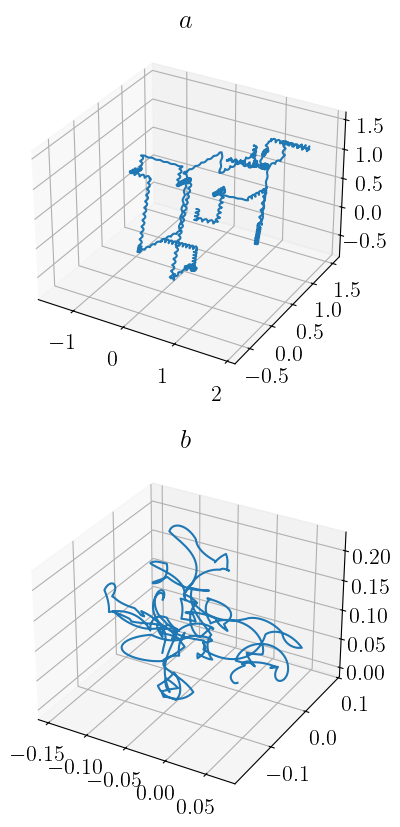

In [44]:
p1 = 0.05 / 8
p2 = 1 / 8
rotorStep1 = 10_000
rotorStep2 = 1_000

isLoad = True 

if isLoad:
    poses_p1 = np.load("poses_p1.npy")
    poses_p2 = np.load("poses_p2.npy")
else:
    rotorR = np.array([0., 0., 0.])
    rotorRotation = np.eye(3)
    poses_p1 = np.zeros((rotorStep1, 3))
    s = 1
    for i in range(rotorStep1):
        if np.random.uniform(0, 1) <= p1:
            s = np.random.randint(0, 24)
        rotorR += np.matmul(rotorRotation, deltaData[s] / 8)
        rotorRotation = np.matmul(RotationDataOver8[s], rotorRotation)
        poses_p1[i, :] = rotorR


    rotorR = np.array([0., 0., 0.])
    rotorRotation = np.eye(3)
    poses_p2 = np.zeros((rotorStep2, 3))
    s = 1
    for i in range(rotorStep2):
        if np.random.uniform(0, 1) <= p2:
            s = np.random.randint(0, 24)
        rotorR += np.matmul(rotorRotation, deltaData[s] / 8)
        rotorRotation = np.matmul(RotationDataOver8[s], rotorRotation)
        poses_p2[i, :] = rotorR

fig = plt.figure(figsize=(20, 10))

# Plot for p1
ax1 = fig.add_subplot(211, projection='3d')
ax1.plot(xs=poses_p1[:, 0], ys=poses_p1[:, 1], zs=poses_p1[:, 2])
ax1.set_title(f"$a$")
# Plot for p2
ax2 = fig.add_subplot(212, projection='3d')

ax2.plot(xs=poses_p2[:, 0], ys=poses_p2[:, 1], zs=poses_p2[:, 2])
ax2.set_title(f"$b$")

plt.savefig("random_walk_comparison.png")
plt.show()
# for i in range(len(breakpoints)):
#     ax.scatter(xs = breakpoints[i][0] , ys = breakpoints[i][1] , zs = breakpoints[i][2] , c = "r" ,s=10 )
# ax.view_init(,)
# save the posses_p1 and poses_p2 to a file
np.save("poses_p1.npy", poses_p1)
np.save("poses_p2.npy", poses_p2)


    

NameError: name 'poses' is not defined

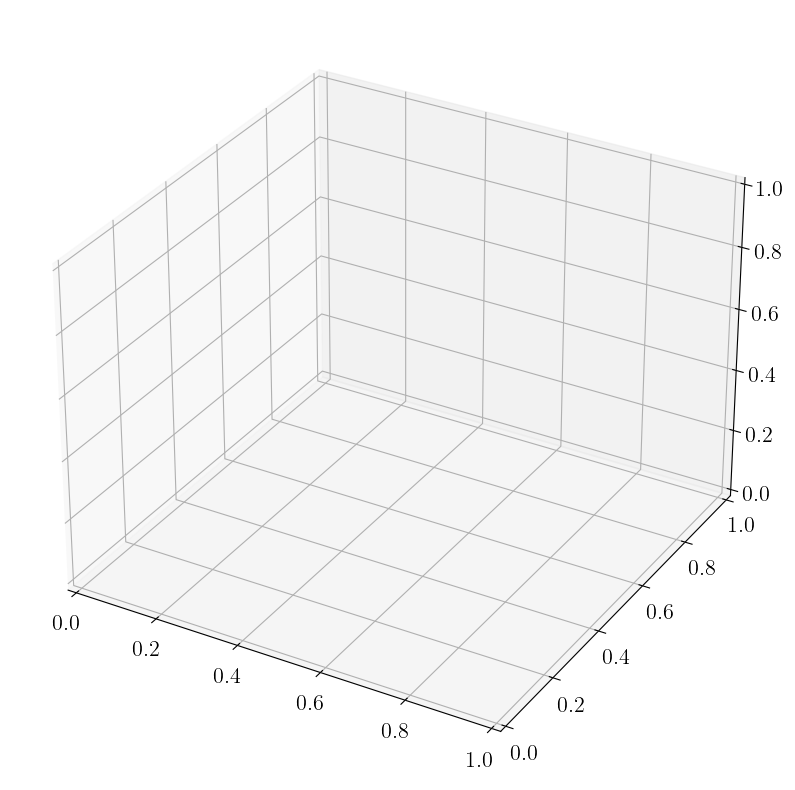

In [12]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

ax.scatter(xs = poses[:,0],ys = poses[:,1], zs=poses[:,2],s=1)
ax.view_init(45,45 )

In [23]:
(rotationData[j]@ deltaData[j])

array([-0.01784251, -0.01078585, -0.02417714])

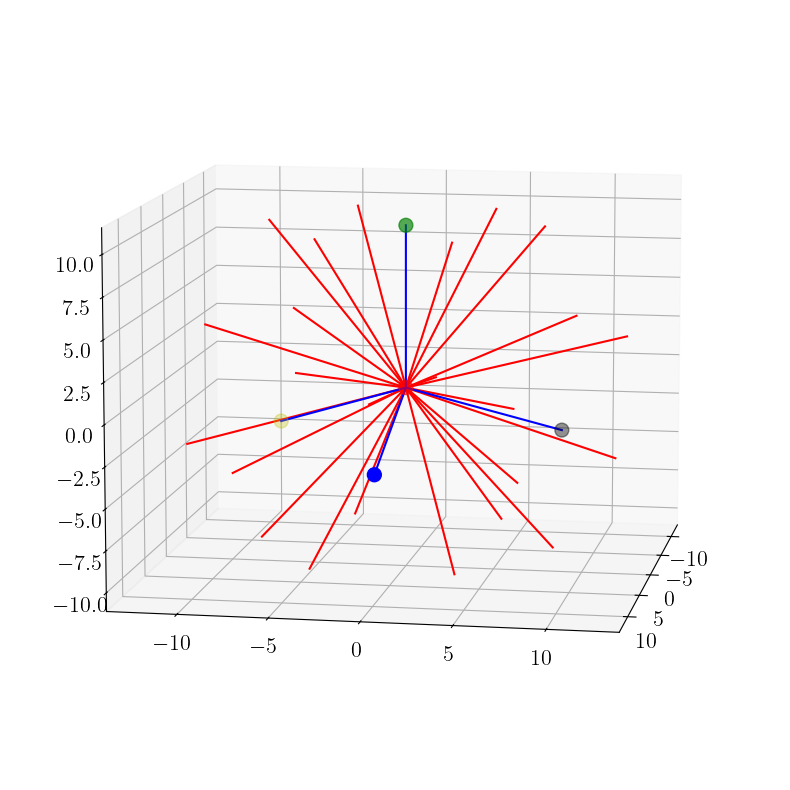

In [31]:

n = 400

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
for j in range(24):
    # ax.plot(xs = [n*deltaData[j,0] , 0] , ys = [n*deltaData[j,1] , 0] , zs = [n*deltaData[j,2] , 0],c="r")
    ax.plot(xs = [n*(rotationData[j]@ deltaData[j])[0] , 0] , ys = [n*(rotationData[j]@ deltaData[j])[1] , 0] , zs = [n*(rotationData[j]@ deltaData[j])[2] , 0],c="r")
    



# plt.title("The bisectors of the joints")
colors = ('r', 'g', 'b', 'k','y')
ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")




# ax.plot(xs = [(r[1,0] + r[2,0])/2 , r[0,0]] , ys = [(r[1,1] + r[2,1])/2  , r[0,1]] , zs = [(r[1,2] + r[2,2])/2  , r[0,2]],c="g")

# ax.plot(xs = [(r[1,0] + r[3,0])/2 , r[0,0]] , ys = [(r[1,1] + r[3,1])/2  , r[0,1]] , zs = [(r[1,2] + r[3,2])/2  , r[0,2]],c="g")

# ax.plot(xs = [(r[1,0] + r[4,0])/2 , r[0,0]] , ys = [(r[1,1] + r[4,1])/2  , r[0,1]] , zs = [(r[1,2] + r[4,2])/2  , r[0,2]],c="g")

# ax.plot(xs = [(r[3,0] + r[2,0])/2 , r[0,0]] , ys = [(r[3,1] + r[2,1])/2  , r[0,1]] , zs = [(r[3,2] + r[2,2])/2  , r[0,2]],c="g")

# ax.plot(xs = [(r[4,0] + r[2,0])/2 , r[0,0]] , ys = [(r[4,1] + r[2,1])/2  , r[0,1]] , zs = [(r[4,2] + r[2,2])/2  , r[0,2]],c="g")

# ax.plot(xs = [(r[3,0] + r[4,0])/2 , r[0,0]] , ys = [(r[3,1] + r[4,1])/2  , r[0,1]] , zs = [(r[3,2] + r[4,2])/2  , r[0,2]],c="g")




ax.view_init(10,10)

# ax.set_zticks([])
# ax.set_xticks([])
# ax.set_yticks([])

plt.savefig("3_2.png")


plt.show()

In [34]:
coors = np.array([[(r[1,0] + r[2,0])/2 , (r[1,1] + r[2,1])/2  , (r[1,2] + r[2,2])/2 ],
 [(r[1,0] + r[3,0])/2 , (r[1,1] + r[3,1])/2  , (r[1,2] + r[3,2])/2 ],
 [(r[1,0] + r[4,0])/2 , (r[1,1] + r[4,1])/2  , (r[1,2] + r[4,2])/2 ],
 [(r[3,0] + r[2,0])/2 , (r[3,1] + r[2,1])/2  , (r[3,2] + r[2,2])/2 ],
 [(r[4,0] + r[2,0])/2 , (r[4,1] + r[2,1])/2  , (r[4,2] + r[2,2])/2 ],
 [(r[3,0] + r[4,0])/2 , (r[3,1] + r[4,1])/2  , (r[3,2] + r[4,2])/2 ]])

coors

array([[ 4.71404521,  0.        ,  3.33333333],
       [-2.3570226 ,  4.0824829 ,  3.33333333],
       [-2.3570226 , -4.0824829 ,  3.33333333],
       [ 2.3570226 ,  4.0824829 , -3.33333333],
       [ 2.3570226 , -4.0824829 , -3.33333333],
       [-4.71404521,  0.        , -3.33333333]])

In [37]:
1 / np.linalg.norm(coors, axis =1)   

array([0.17320508, 0.17320508, 0.17320508, 0.17320508, 0.17320508,
       0.17320508])

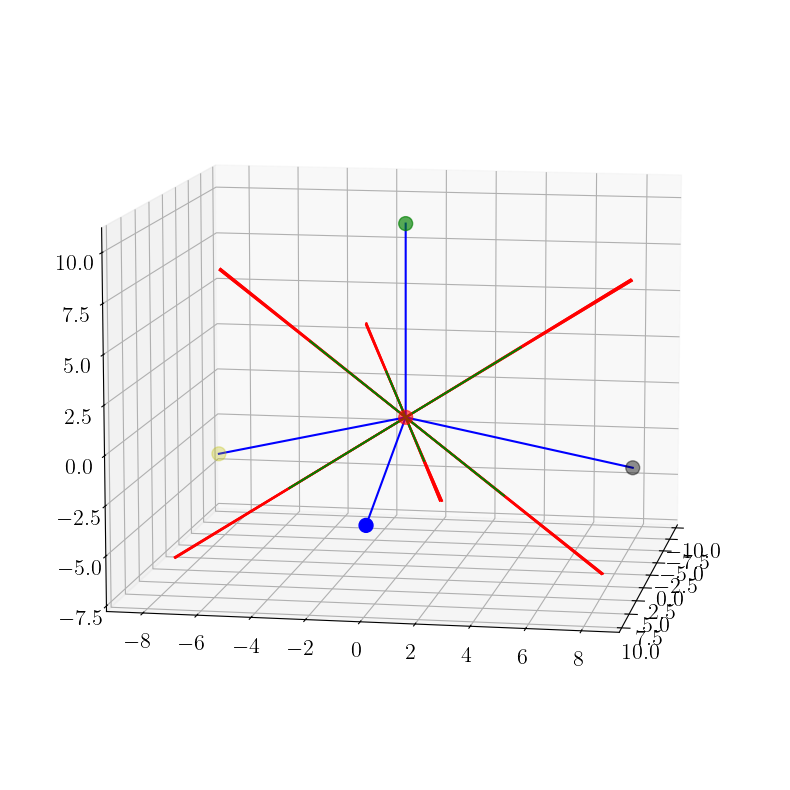

In [32]:

n = 800

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
for j in range(24):
    ax.plot(xs = [n*sequencesData[j,0] , 0] , ys = [n*sequencesData[j,1] , 0] , zs = [n*sequencesData[j,2] , 0],c="r")
    



# plt.title("The bisectors of the joints")
colors = ('r', 'g', 'b', 'k','y')
ax.scatter(xs = r[:,0],ys = r[:,1] , zs=r[:,2],c=colors,s=100)

for j in range(0,5):
    ax.plot(xs = [r[j,0] , r[0,0]] , ys = [r[j,1] , r[0,1]] , zs = [r[j,2] , r[0,2]],c="b")




ax.plot(xs = [(r[1,0] + r[2,0])/2 , r[0,0]] , ys = [(r[1,1] + r[2,1])/2  , r[0,1]] , zs = [(r[1,2] + r[2,2])/2  , r[0,2]],c="g")

ax.plot(xs = [(r[1,0] + r[3,0])/2 , r[0,0]] , ys = [(r[1,1] + r[3,1])/2  , r[0,1]] , zs = [(r[1,2] + r[3,2])/2  , r[0,2]],c="g")

ax.plot(xs = [(r[1,0] + r[4,0])/2 , r[0,0]] , ys = [(r[1,1] + r[4,1])/2  , r[0,1]] , zs = [(r[1,2] + r[4,2])/2  , r[0,2]],c="g")

ax.plot(xs = [(r[3,0] + r[2,0])/2 , r[0,0]] , ys = [(r[3,1] + r[2,1])/2  , r[0,1]] , zs = [(r[3,2] + r[2,2])/2  , r[0,2]],c="g")

ax.plot(xs = [(r[4,0] + r[2,0])/2 , r[0,0]] , ys = [(r[4,1] + r[2,1])/2  , r[0,1]] , zs = [(r[4,2] + r[2,2])/2  , r[0,2]],c="g")

ax.plot(xs = [(r[3,0] + r[4,0])/2 , r[0,0]] , ys = [(r[3,1] + r[4,1])/2  , r[0,1]] , zs = [(r[3,2] + r[4,2])/2  , r[0,2]],c="g")




ax.view_init(10,10)

# ax.set_zticks([])
# ax.set_xticks([])
# ax.set_yticks([])

plt.savefig("3_2.png")


plt.show()

In [ ]:
1234
1243
1324
1423
1432
1342

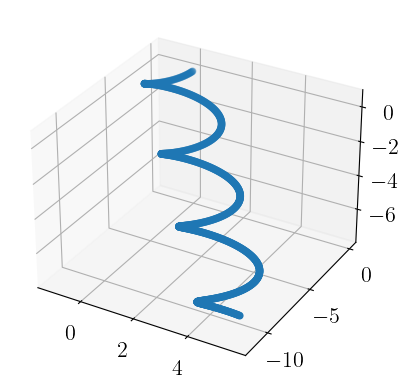

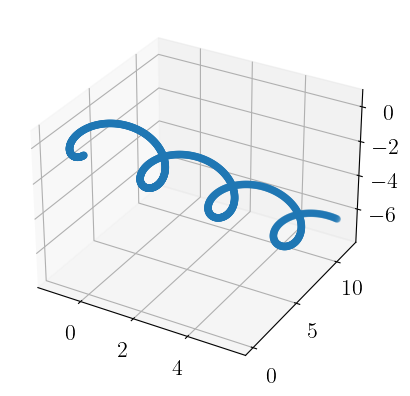

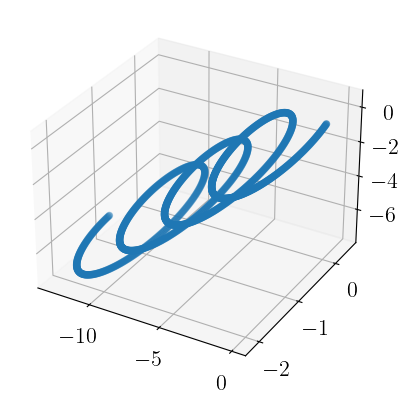

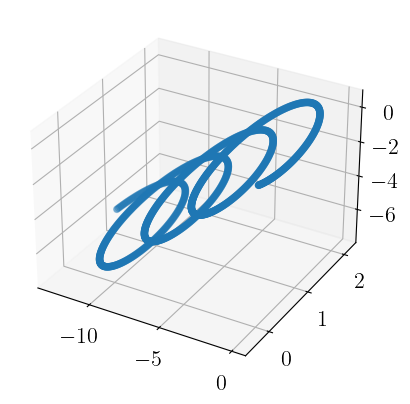

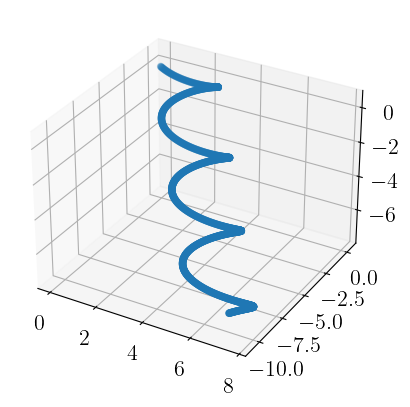

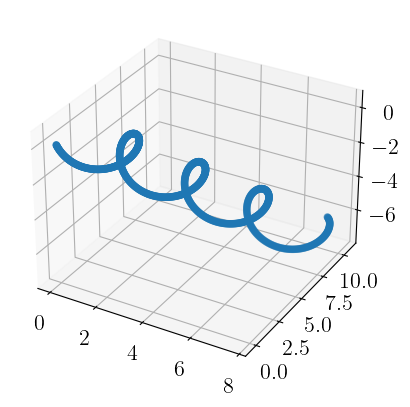

In [26]:
s1,s2,s3,s4,s5,s6 = getSequenceEffect(10,3,1_000)

In [17]:
s1p = s1/np.linalg.norm(s1)
s2p = s2/np.linalg.norm(s2)
s3p = s3/np.linalg.norm(s3)
s4p = s4/np.linalg.norm(s4)
s5p = s5/np.linalg.norm(s5)
s6p = s6/np.linalg.norm(s6)

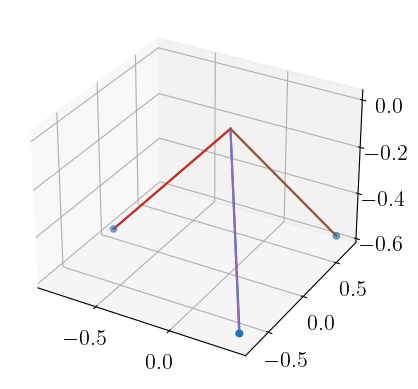

In [18]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(xs = [s1p[0],s2p[0],s3p[0],s4p[0],s5p[0],s6p[0]],ys = [s1p[1],s2p[1],s3p[1],s4p[1],s5p[1],s6p[1]], zs=[s1p[2],s2p[2],s3p[2],s4p[2],s5p[2],s6p[2]])

ax.plot(xs =[s1p[0],0], ys = [s1p[1],0], zs=[s1p[2],0])
ax.plot(xs =[s2p[0],0], ys = [s2p[1],0], zs=[s2p[2],0])
ax.plot(xs =[s3p[0],0], ys = [s3p[1],0], zs=[s3p[2],0])
ax.plot(xs =[s4p[0],0], ys = [s4p[1],0], zs=[s4p[2],0])
ax.plot(xs =[s5p[0],0], ys = [s5p[1],0], zs=[s5p[2],0])
ax.plot(xs =[s6p[0],0], ys = [s6p[1],0], zs=[s6p[2],0])
plt.show()


        

In [5]:
actionsData = np.load("actionDatasForE=3.npy")

In [19]:
# @njit
def getAction(state, dic):
    changingJoint = dic[fromBinary(state)]


  
    return changingJoint -1 


# @njit
def doStep(Data,state,dic):
    action = getAction(state,dic)
    new_state = state.copy()
    new_state[action] = 1 - new_state[action]
    delta = Data[fromBinary(state)*4 + action][0,:]  
    rotation = Data[fromBinary(state)*4 + action][1:,:]
    return new_state,delta,rotation



def perturbe(Data,perturbingSteps,dic):
    pertrubingPose = np.array([0.,0.,0.])
    perturbingRotation = np.eye(3)
    state = np.ones(4,dtype=np.int64)
    pertrubingPoses = np.zeros((perturbingSteps,3))

        
    for t in range(perturbingSteps):
        newState,delta,rotation = doStep(Data,state,dic)
        state = newState
        pertrubingPose += perturbingRotation @ delta
        perturbingRotation = rotation @ perturbingRotation
        pertrubingPoses[t] = pertrubingPose


        
    return pertrubingPoses

In [20]:
poses = perturbe(actionsData,10000000,d1)


ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter(xs = poses[:,0] , ys = poses[:,0], zs = poses[:,0])

NameError: name 'actionsData' is not defined

In [21]:
@njit
def changeState(state,index):
    state[index] = 1 - state[index]
    return state


@njit
def getBinary(int: a):
    return np.array([int//8,(int%8)//4,(int%4)//2,int%2])
@njit
def fromBinary(binary):
    x = 0
    for i in range(len(binary)):
        x += binary[::-1][i]*(2**i)
    return x


In [22]:
sq1, sq2, sq3, sq4, sq5, sq6 = [[1,2,3,4], [1,2,4,3] , [1,3,2,4], [1,3,4,2] , [1,4,3,2] , [1,4,2,3]]
d1 , d2 , d3 , d4 , d5 , d6  = {} , {} , {} , {} , {} , {} 

sqs = [sq1, sq2, sq3, sq4, sq5, sq6 ]
ds = [d1 , d2 , d3 , d4 , d5 , d6]

for i in range(6):
    sq = sqs[i]
    d = ds[i]

    state = np.array([1,1,1,1])
    for j in sq:
        changeState(state,j-1)
        d[fromBinary(state)]  = j 
        
        # print(state)

    for j in sq:
        changeState(state,j-1)
        d[fromBinary(state)]  = j 
        
        # print(state)

In [23]:
r = np.zeros(3)
orientation = np.eye(3)
state =  np.array([0,0,0,0])
sequence = d3
steps = 8
trajectory = np.zeros((steps , 3 ))

for i in range(steps):
    print(state)
    
    
    action = sequence[fromBinary(state)]

    delta = actionsData[fromBinary(state)*4 + action-1][0,:]  
    rotation = actionsData[fromBinary(state)*4 + action-1][1:,:]

    state[action-1] = 1 - state[action-1]

    trajectory[i] = r 
    r += orientation @ delta 
    orientation = rotation @ orientation



    # print(delta)



[0 0 0 0]


NameError: name 'actionsData' is not defined

In [ ]:

r , orientation

(array([-0.00097609, -0.02029201, -0.02494414]),
 array([[ 9.99913699e-01,  1.31409194e-02,  7.28221976e-05],
        [-1.31397399e-02,  9.99742607e-01,  1.84985858e-02],
        [ 1.70369287e-04, -1.84981434e-02,  9.99828845e-01]]))

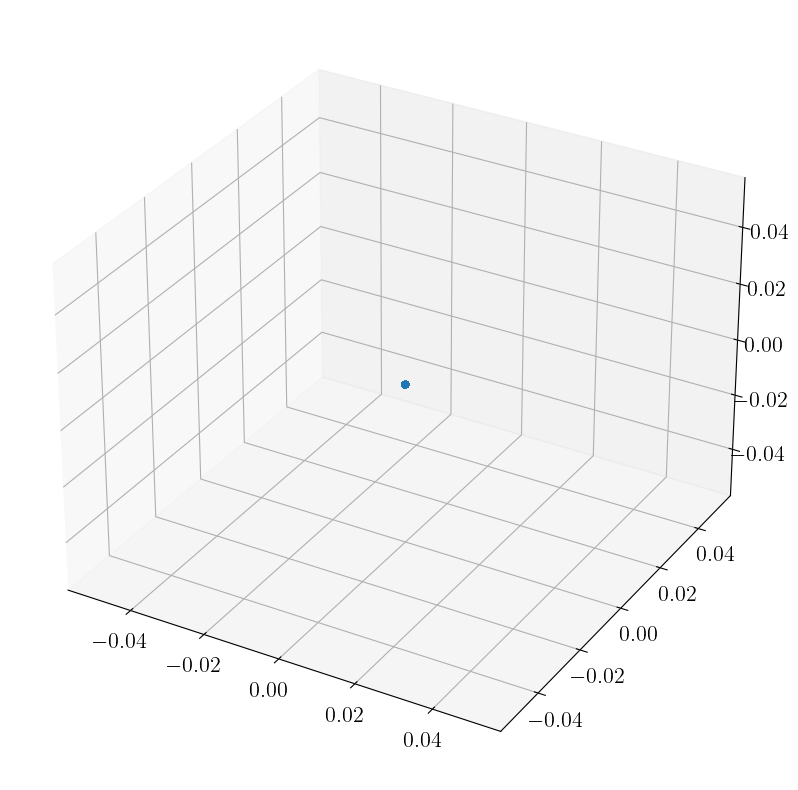

In [24]:
poses = np.zeros((10000,3))
pose = np.zeros(3)
angle = np.eye(3)
for j in range(100):
    poses[j] = pose 
    pose += np.matmul(angle, r) 
    angle = np.matmul(orientation , angle )

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter(xs = poses[:,0] , ys = poses[:,0], zs = poses[:,0])

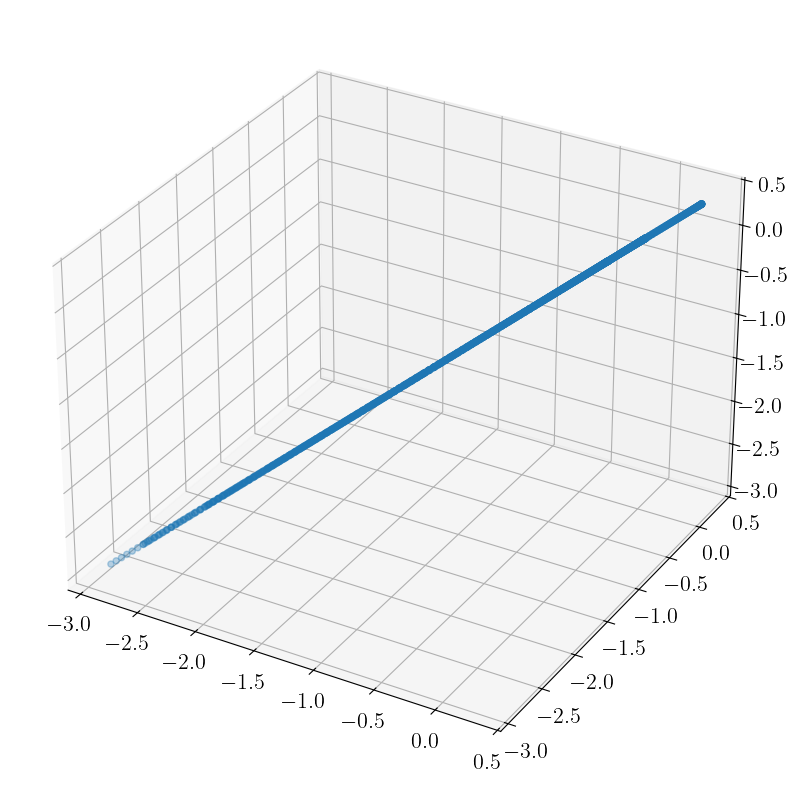

In [153]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter(xs = trajectory[:,0] , ys = trajectory[:,0], zs = trajectory[:,0])